In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../datasets/network_anomaly_dataset.csv")
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
# shape of the data
df.shape

(125973, 43)

In [5]:
# data types of each column in the data and structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

In [6]:
# for testing the hypotheses it would be appropriate if the target column had 2 values
# 0 representing normal connections, and 1 representing an attack 
# adding a new feature that represents if a connection is normal or an attack
def normal_or_attack(x):
    if x == "normal":
        return 0
    else:
        return 1
    
df["normal_or_attack"] = df["attack"].apply(normal_or_attack)
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,normal_or_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


In [7]:
# the "normal_or_attack" column will be the target variable for the model
# dropping the "attack" column
df.drop(columns = ["attack"], inplace = True)
df.shape

(125973, 43)

In [8]:
# dropping the redundant and undefined columns
# the only unique value in the "numoutboundcmds" column is 0, hence "numoutboundcmds" is dropped from the DataFrame
# there is no description available of the "lastflag" column in the column profiling, hence "lastflag" is dropped from the DataFrame
df.drop(columns = ["numoutboundcmds", "lastflag"], inplace = True)
df.shape

(125973, 41)

In [9]:
# rectifying the "suattempted" column
df["suattempted"].unique()

array([0, 1, 2])

In [10]:
df["suattempted"].value_counts()

suattempted
0    125893
2        59
1        21
Name: count, dtype: int64

In [11]:
def correct_suattempted(x):
    if x == 0 or x == 1:
        return x
    elif x == 2:
        return 1
    
df["suattempted"] = df["suattempted"].apply(correct_suattempted)
df["suattempted"].value_counts()

suattempted
0    125893
1        80
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

### Hypothesis 1: Network connections with unusually high or low traffic volumns (bytes transferred) are more likely to be anomalous.
This hypothesis can further be simplified into 2 scenarios,
1.  Network connections with unusually high or low traffic volumes from source to destination are more likely to be anomalous.
    - Null hypothesis (H0): There is no significant difference in the network traffic volume from source to destination of normal connection and attack connection.
    - Alternate hypothesis (H1): There is a significant difference in the network traffic volume from source to destination of normal connection and attack connection.
2.  Network connections with unusually high or low traffic volumes from destination to source are more likely to be anomalous.
    - Null hypothesis (H0): There is no significant difference in the network traffic volume from destination to source of normal connection and attack connection.
    - Alternate hypothesis (H1): There is a significant difference in the network traffic volume from destination to source of normal connection and attack connection.

In [13]:
# independent samples t-test for scenario 1
normal = df[df["normal_or_attack"] == 0]
attack = df[df["normal_or_attack"] == 1]

In [14]:
normal_src_bytes = normal["srcbytes"]
attack_src_bytes = attack["srcbytes"]

In [15]:
# alpha = 0.05
from scipy.stats import ttest_ind

result = ttest_ind(normal_src_bytes, attack_src_bytes)
result

Ttest_indResult(statistic=-2.101656020563486, pvalue=0.03558539933331456)

In [16]:
alpha = 0.05
p_value = result[1]
if p_value < alpha:
    print("H1")
else:
    print("H0")

H1


In [17]:
# independent samples t-test for scenario 1
normal = df[df["normal_or_attack"] == 0]
attack = df[df["normal_or_attack"] == 1]

In [18]:
normal_dst_bytes = normal["dstbytes"]
attack_dst_bytes = attack["dstbytes"]

In [19]:
# alpha = 0.05
from scipy.stats import ttest_ind

result = ttest_ind(normal_dst_bytes, attack_dst_bytes)
result

Ttest_indResult(statistic=-1.4614241258205836, pvalue=0.14390157812640425)

In [20]:
alpha = 0.05
p_value = result[1]
if p_value < alpha:
    print("H1")
else:
    print("H0")

H0


### Hypothesis 2: Certain protocols are more frequently associated with network anomalies.
- Null hypothesis (H0): There is no significant difference in the likelihood of network anomalies among different protocol types.
- Alternate hypothesis (H1): There is a significant difference in the likelihood of network anomalies among different protocol types.

In [21]:
pd.crosstab(df["protocoltype"], df["normal_or_attack"])

normal_or_attack,0,1
protocoltype,,
icmp,1309,6982
tcp,53600,49089
udp,12434,2559


In [22]:
from scipy.stats import chi2_contingency

result = chi2_contingency(pd.crosstab(df["protocoltype"], df["normal_or_attack"]))
result

Chi2ContingencyResult(statistic=10029.24862778463, pvalue=0.0, dof=2, expected_freq=array([[ 4432.22605638,  3858.77394362],
       [54895.77391187, 47793.22608813],
       [ 8015.00003175,  6977.99996825]]))

In [23]:
alpha = 0.05
p_value = result[1]
if p_value < alpha:
    print("H1")
else:
    print("H0")

H1


### Hypothesis 3: Specific services are targets of network anomalies more often than others.
- Null hypothesis (H0): There is no significant difference in the likelihood of network anomalies among different services.
- Alternate hypothesis (H1): There is no significant difference in the likelihood of network anomalies among different services.

In [24]:
pd.crosstab(df["service"], df["normal_or_attack"])

normal_or_attack,0,1
service,,
IRC,186,1
X11,67,6
Z39_50,0,862
aol,0,2
auth,236,719
...,...,...
urp_i,599,3
uucp,0,780
uucp_path,0,689


In [25]:
from scipy.stats import chi2_contingency

result = chi2_contingency(pd.crosstab(df["service"], df["normal_or_attack"]))
result

Chi2ContingencyResult(statistic=93240.03213516614, pvalue=0.0, dof=69, expected_freq=array([[9.99669850e+01, 8.70330150e+01],
       [3.90245449e+01, 3.39754551e+01],
       [4.60810380e+02, 4.01189620e+02],
       [1.06916561e+00, 9.30834385e-01],
       [5.10526581e+02, 4.44473419e+02],
       [3.79553793e+02, 3.30446207e+02],
       [3.92383781e+02, 3.41616219e+02],
       [2.91347630e+02, 2.53652370e+02],
       [3.00970121e+02, 2.62029879e+02],
       [2.78517643e+02, 2.42482357e+02],
       [2.87605550e+02, 2.50394450e+02],
       [3.04177617e+02, 2.64822383e+02],
       [4.83423233e+03, 4.20876767e+03],
       [2.32008938e+02, 2.01991062e+02],
       [2.45159675e+03, 2.13440325e+03],
       [1.64491130e+03, 1.43208870e+03],
       [2.59272662e+02, 2.25727338e+02],
       [2.53392251e+02, 2.20607749e+02],
       [9.44607821e+02, 8.22392179e+02],
       [9.37658244e+02, 8.16341756e+02],
       [3.66723806e+03, 3.19276194e+03],
       [2.76913894e+02, 2.41086106e+02],
       [1.069

In [26]:
alpha = 0.05
p_value = result[1]
if p_value < alpha:
    print("H1")
else:
    print("H0")

H1


### Hypothesis 4: Error flags in the Flag feature are significantly associated with anomalies.
- Null hypothesis (H0): There is no significant difference in the likelihood of network anomalies between connections with and without error flags.
- Alternate hypothesis (H1): There is a significant difference in the likelihood of network anomalies between connections with and without error flags.

### Hypothesis 5: Connections that include urgent packets are more likely to be anomolous.
- Null hypothesis (H0): There is no significant difference in the likelihood of network anomalies between connections with and without urgent packets.
- Alternate hypothesis (H1): There is a significant difference in the likelihood of network anomalies between connections with and without urgent packets.

In [27]:
df.shape

(125973, 41)

In [28]:
# target encoding to encode "protocoltype", "service" and "flag" columns
df["protocoltype"].unique(), df["service"].unique(), df["flag"].unique()

(array(['tcp', 'udp', 'icmp'], dtype=object),
 array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
        'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
        'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
        'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
        'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
        'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
        'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
        'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
        'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
        'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
        'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object),
 array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
        'S2', 'OTH'], dtype=object))

In [29]:
# creating a new feature by adding "srcbytes" and "dstbytes"
df["srcbytes_plus_dstbytes"] = df["srcbytes"] + df["dstbytes"]
# creating a variable "grouped_mean_traffic_protocol" that contains the mean of "srcbytes_plus_dstbytes" grouped by the "protocoltype" column
grouped_mean_traffic_protocol = df.groupby("protocoltype")["srcbytes_plus_dstbytes"].mean().reset_index()
# merging "grouped_data" with the original DataFrame
df = pd.merge(df, grouped_mean_traffic_protocol, on = "protocoltype", how = "left")
df.rename(columns = {"srcbytes_plus_dstbytes_y": "protocol_encoded"}, inplace = True)
df.drop(columns = ["protocoltype", "srcbytes_plus_dstbytes_x"], inplace = True)
df.head()

,duration,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,normal_or_attack,protocol_encoded
0,0,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,80114.288249
1,0,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,141.215034
2,0,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,80114.288249
3,0,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,80114.288249
4,0,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,80114.288249


In [30]:
# repeating the same for "service" column
df["srcbytes_plus_dstbytes"] = df["srcbytes"] + df["dstbytes"]
grouped_mean_traffic_service = df.groupby("service")["srcbytes_plus_dstbytes"].mean().reset_index()
df = pd.merge(df, grouped_mean_traffic_service, on = "service", how = "left")
df.rename(columns = {"srcbytes_plus_dstbytes_y": "service_encoded"}, inplace = True)
df.drop(columns = ["service", "srcbytes_plus_dstbytes_x"], inplace = True)
df.head()

,duration,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,normal_or_attack,protocol_encoded,service_encoded
0,0,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,80114.288249,143597.026531
1,0,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,141.215034,312548.734113
2,0,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,80114.288249,90075.670572
3,0,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,80114.288249,6006.811369
4,0,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,80114.288249,6006.811369


In [31]:
# repeating the same for "flag" column
df["srcbytes_plus_dstbytes"] = df["srcbytes"] + df["dstbytes"]
grouped_mean_traffic_flag = df.groupby("flag")["srcbytes_plus_dstbytes"].mean().reset_index()
df = pd.merge(df, grouped_mean_traffic_flag, on = "flag", how = "left")
df.rename(columns = {"srcbytes_plus_dstbytes_y": "flag_encoded"}, inplace = True)
df.drop(columns = ["flag", "srcbytes_plus_dstbytes_x"], inplace = True)
df.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,normal_or_attack,protocol_encoded,service_encoded,flag_encoded
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,80114.288249,143597.026531,20935.941797
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,141.215034,312548.734113,20935.941797
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,80114.288249,90075.670572,0.025365
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,80114.288249,6006.811369,20935.941797
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,80114.288249,6006.811369,20935.941797


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   srcbytes                125973 non-null  int64  
 2   dstbytes                125973 non-null  int64  
 3   land                    125973 non-null  int64  
 4   wrongfragment           125973 non-null  int64  
 5   urgent                  125973 non-null  int64  
 6   hot                     125973 non-null  int64  
 7   numfailedlogins         125973 non-null  int64  
 8   loggedin                125973 non-null  int64  
 9   numcompromised          125973 non-null  int64  
 10  rootshell               125973 non-null  int64  
 11  suattempted             125973 non-null  int64  
 12  numroot                 125973 non-null  int64  
 13  numfilecreations        125973 non-null  int64  
 14  numshells           

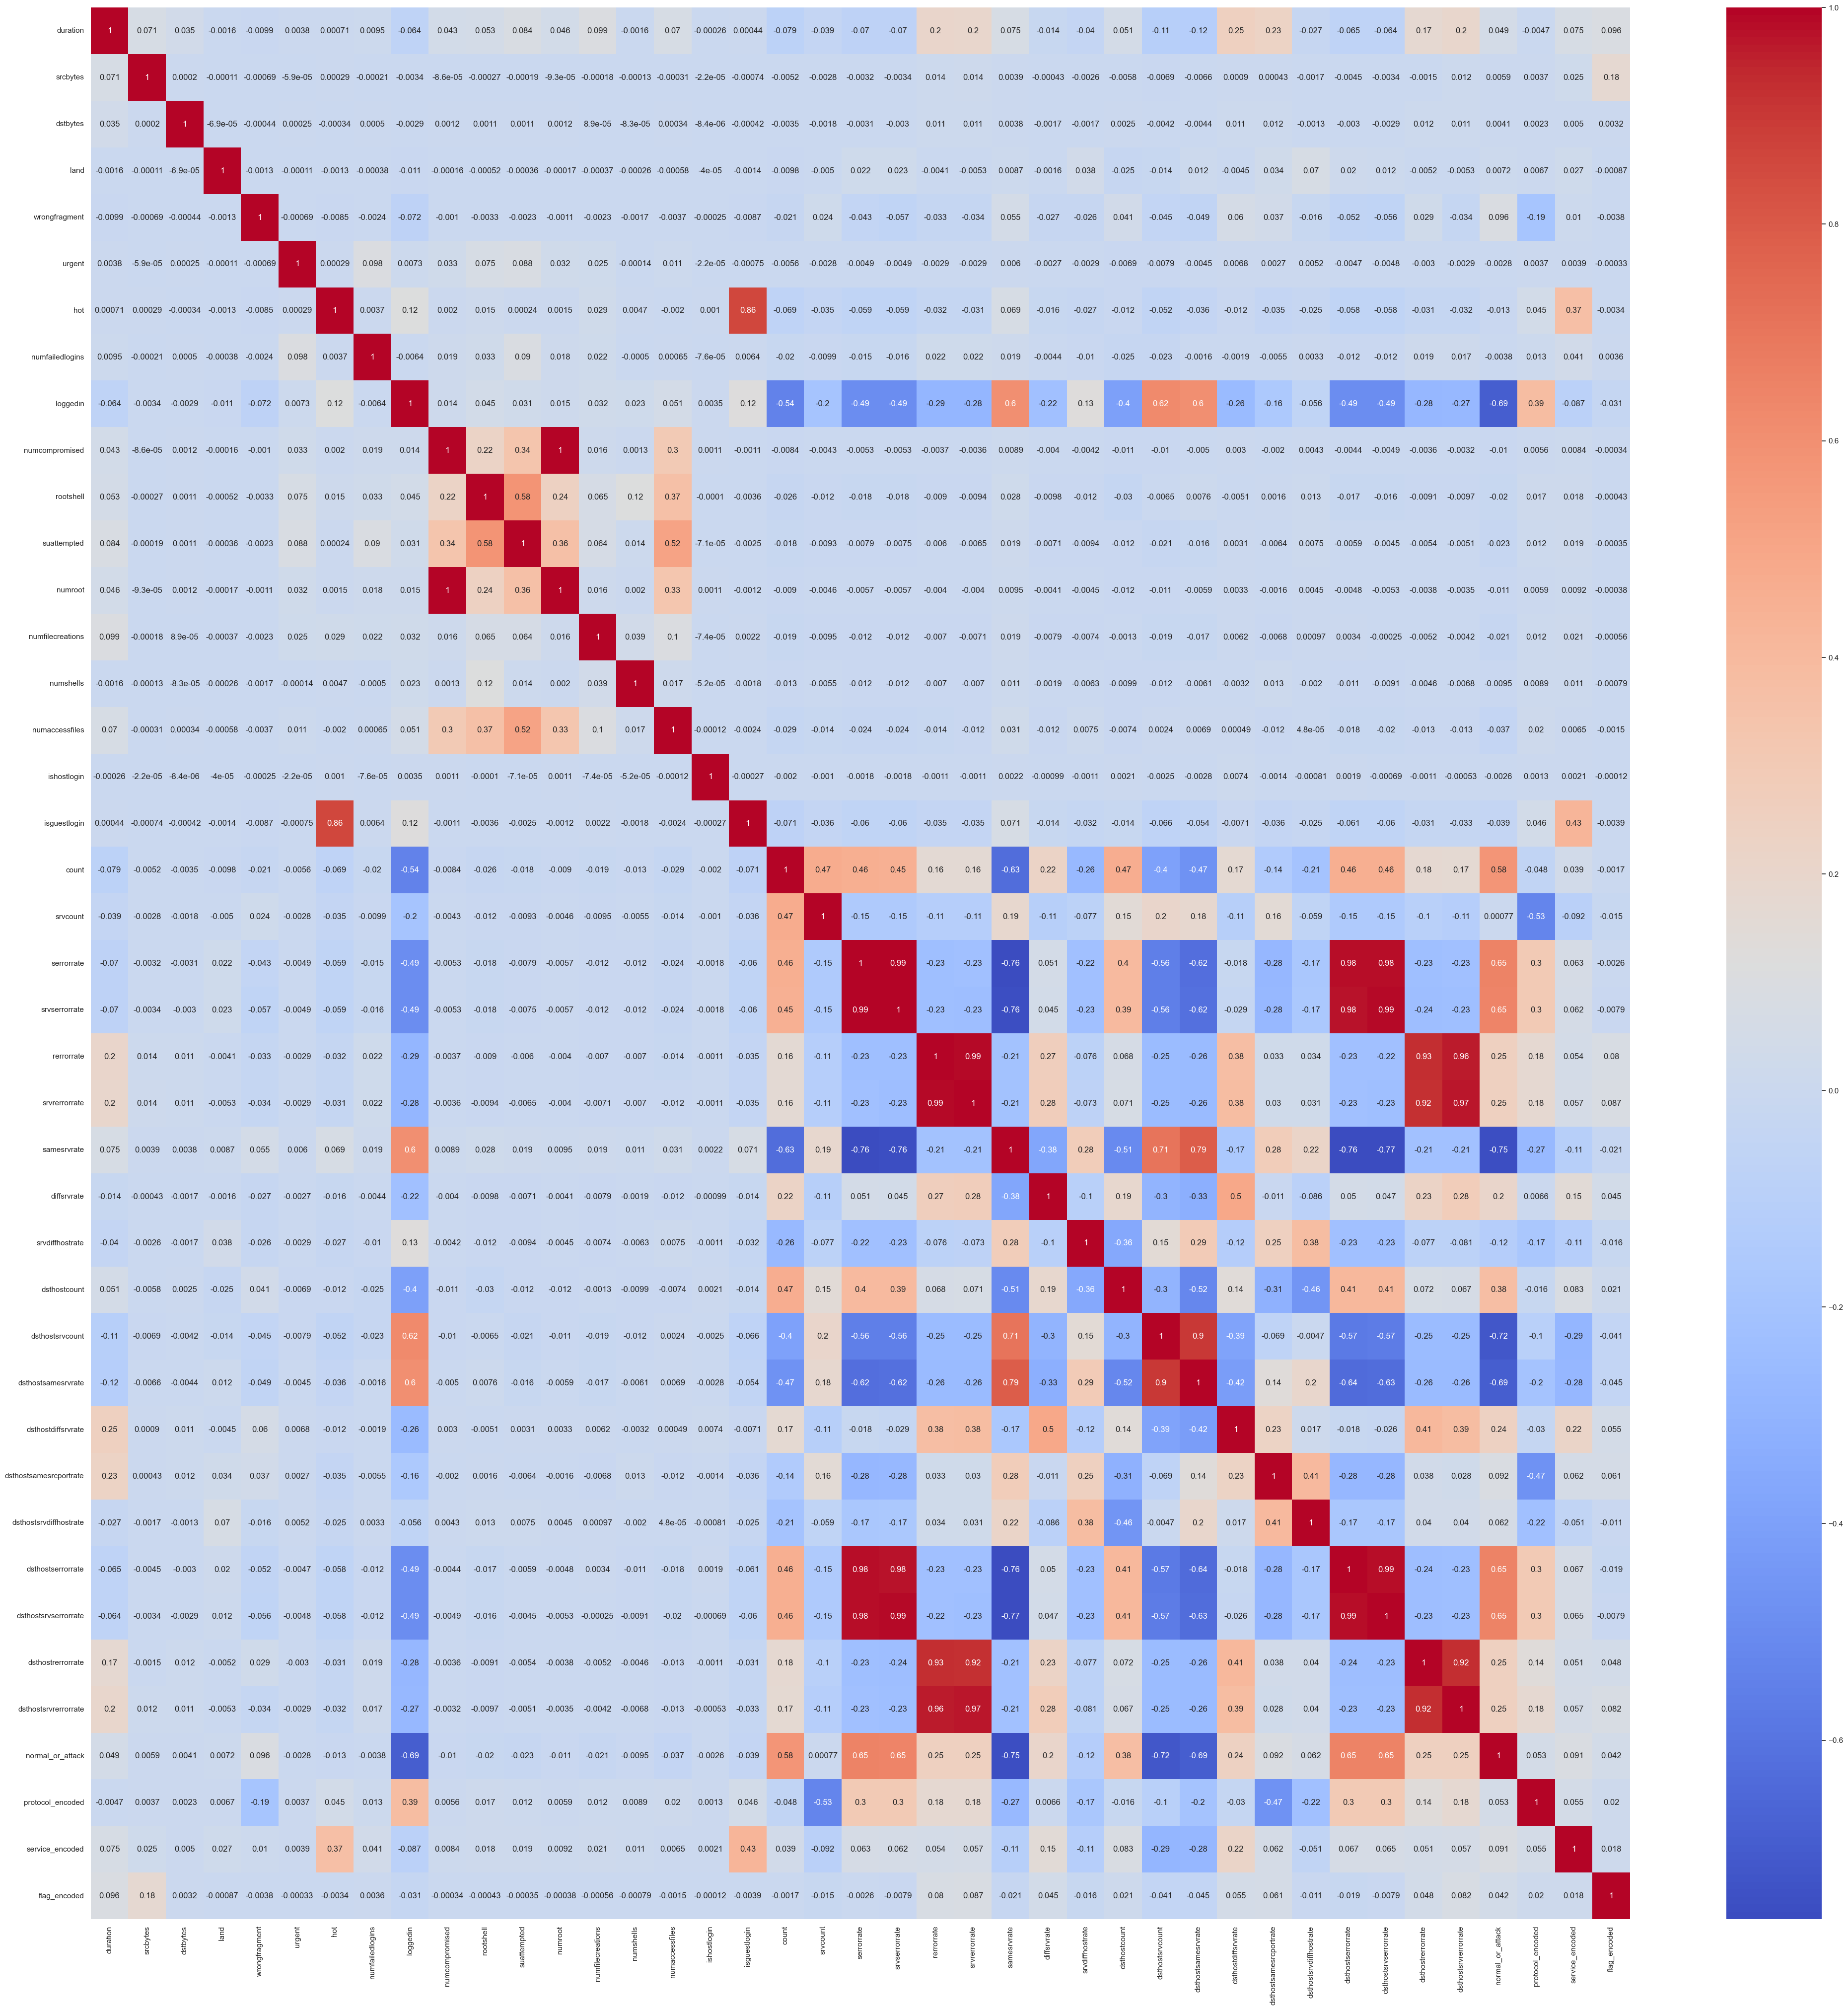

In [33]:
# heatmap to find the correlation between different variables
plt.figure(figsize = (50, 50))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [34]:
df.shape

(125973, 41)

In [35]:
# dropping all the highly correlated variables
df.drop(columns = [
    "isguestlogin",
    "numroot",
    "srvserrorrate",
    "dsthostserrorrate",
    "dsthostsrvserrorrate",
    "srvrerrorrate",
    "dsthostrerrorrate",
    "dsthostsrvrerrorrate",
    "dsthostsamesrvrate"
], inplace = True)
df.shape

(125973, 32)

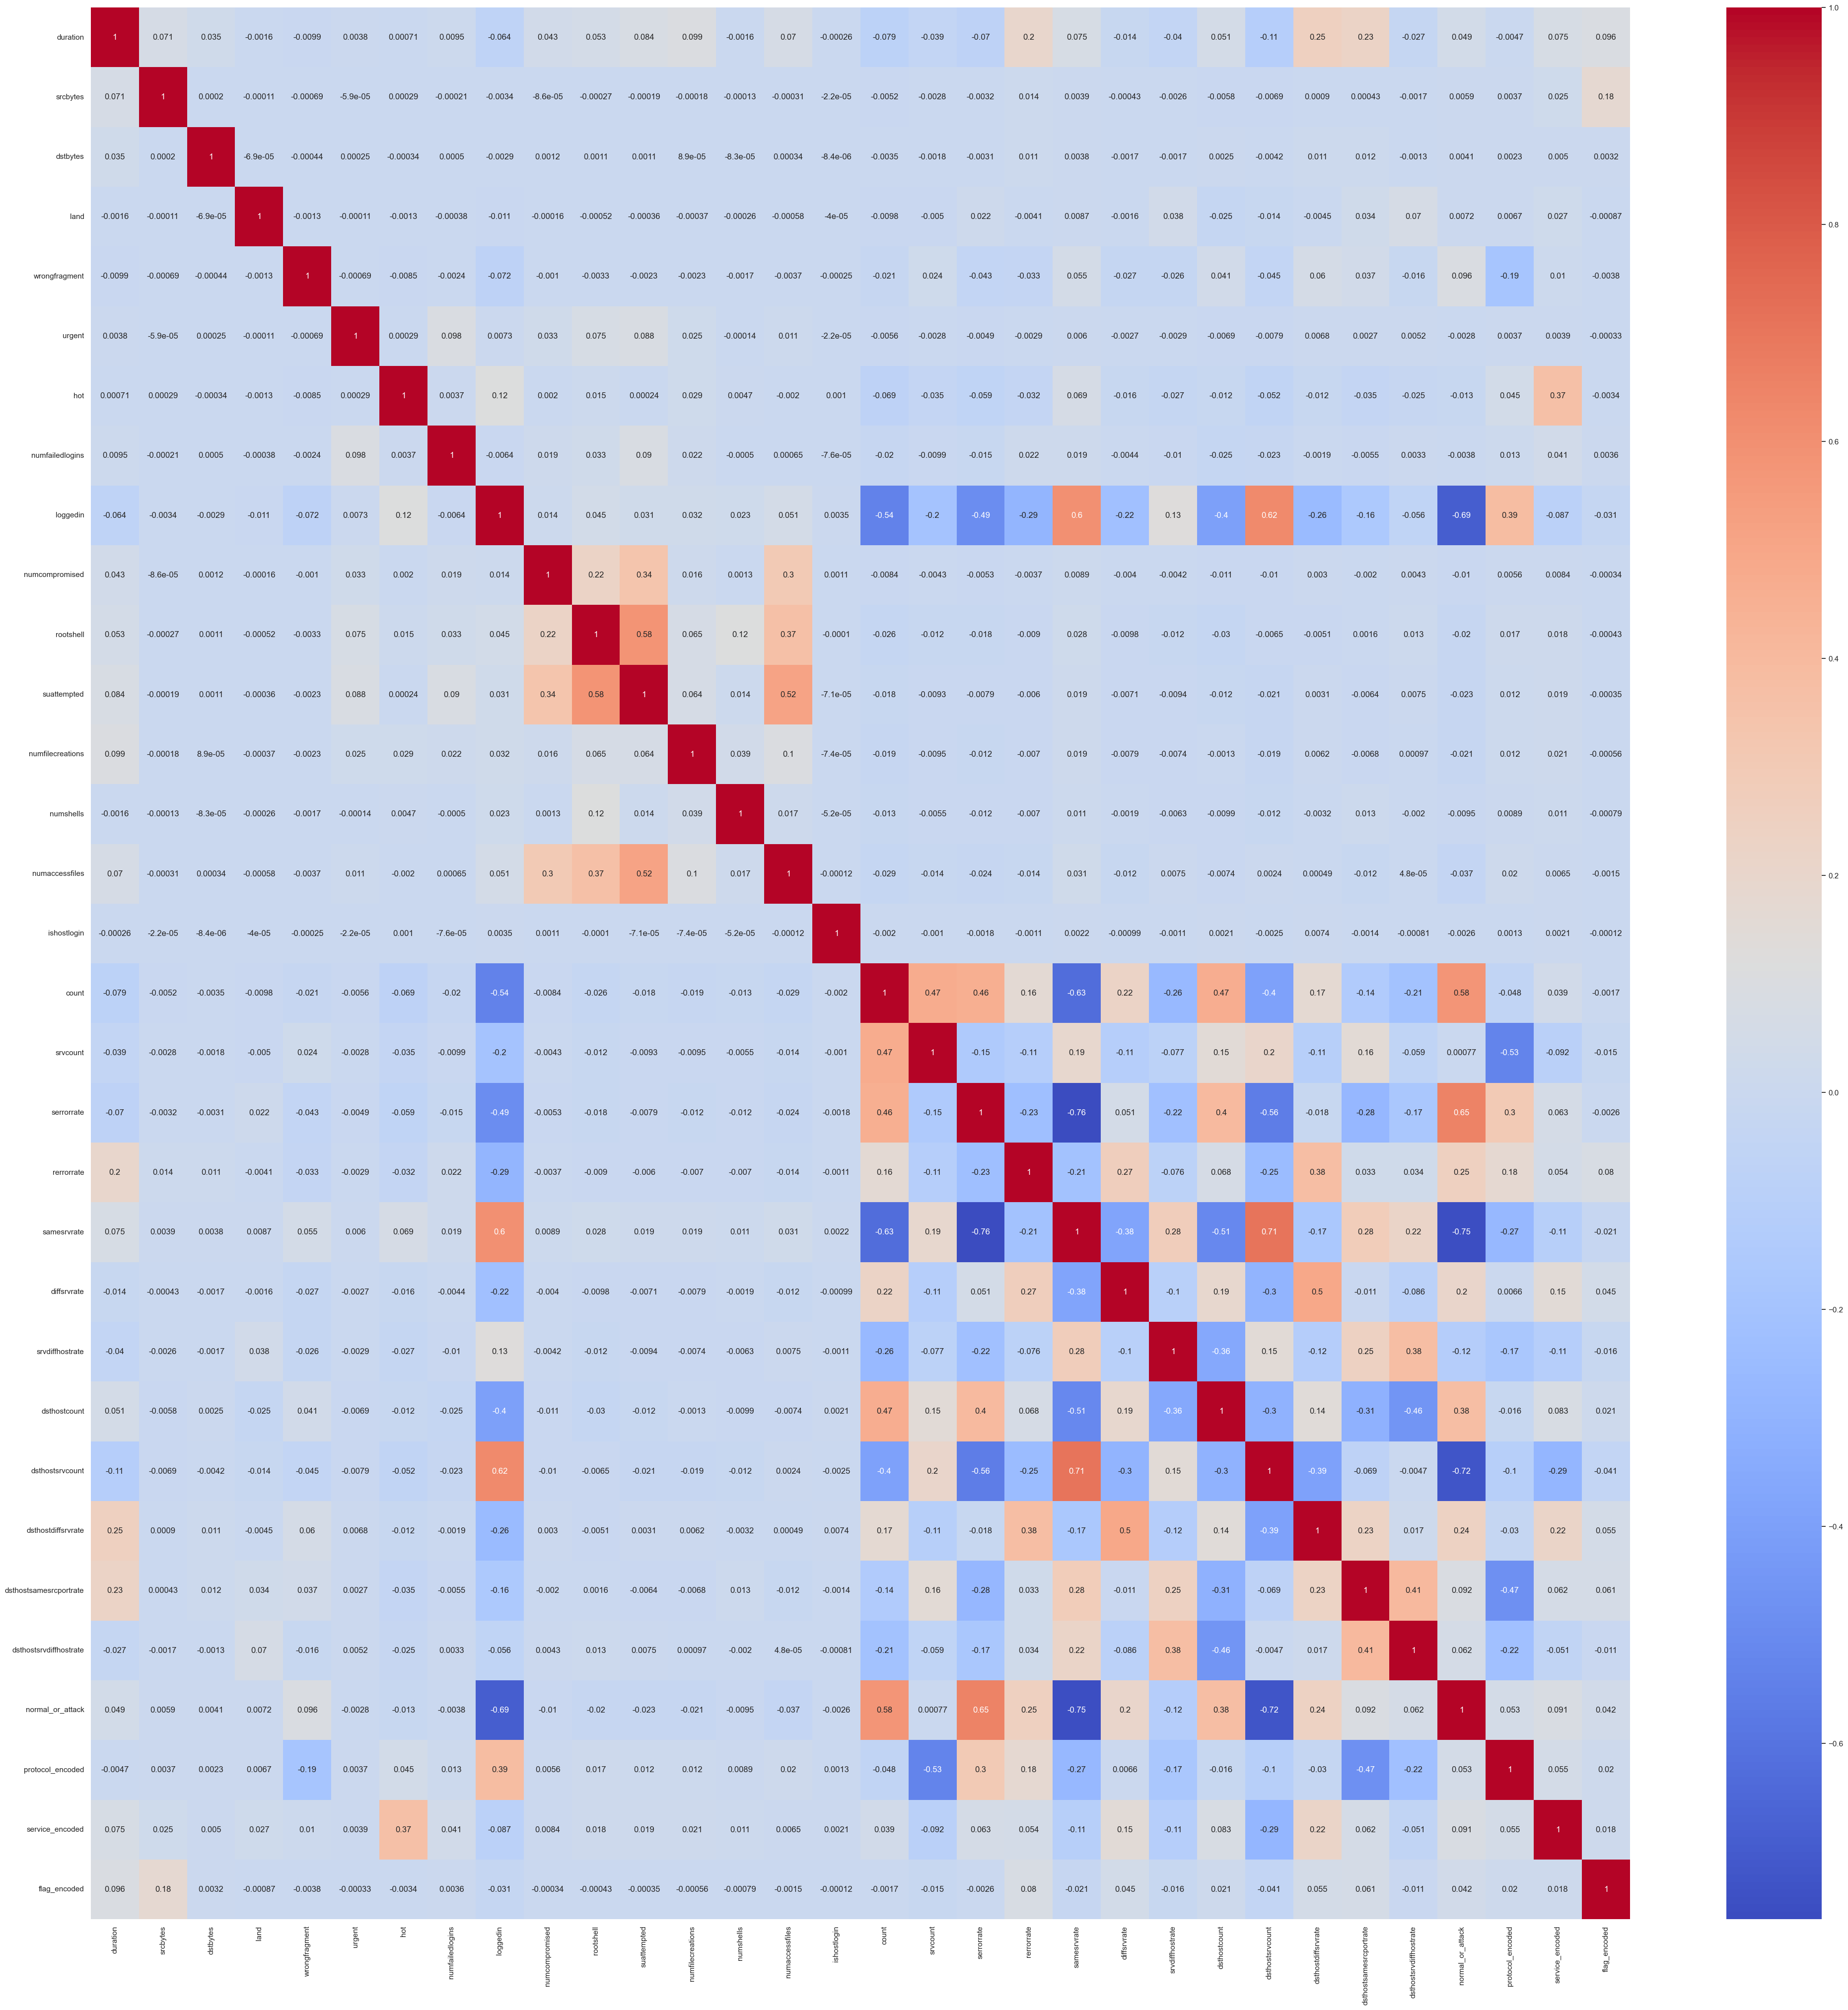

In [36]:
# heatmap to find the correlation between different variables after removing the highly correlated variables
plt.figure(figsize = (50, 50))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [37]:
df.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,normal_or_attack,protocol_encoded,service_encoded,flag_encoded
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,0,80114.288249,143597.026531,20935.941797
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,0,141.215034,312548.734113,20935.941797
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,1,80114.288249,90075.670572,0.025365
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,0,80114.288249,6006.811369,20935.941797
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,0,80114.288249,6006.811369,20935.941797


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   srcbytes                125973 non-null  int64  
 2   dstbytes                125973 non-null  int64  
 3   land                    125973 non-null  int64  
 4   wrongfragment           125973 non-null  int64  
 5   urgent                  125973 non-null  int64  
 6   hot                     125973 non-null  int64  
 7   numfailedlogins         125973 non-null  int64  
 8   loggedin                125973 non-null  int64  
 9   numcompromised          125973 non-null  int64  
 10  rootshell               125973 non-null  int64  
 11  suattempted             125973 non-null  int64  
 12  numfilecreations        125973 non-null  int64  
 13  numshells               125973 non-null  int64  
 14  numaccessfiles      

In [39]:
# # encoding the categorical features
# # applying ohe to encode "protocoltype" and "flag"
# dummies = ["protocoltype", "flag"]
# df = pd.get_dummies(df, columns = dummies, drop_first = True)
# df.shape

In [40]:
# # applying label encoding to "protocoltype" and "flag"
# protocol_map = {
#     "icmp": 0,
#     "tcp": 1,
#     "udp": 2
# }
# flag_map = {
#     "SF": 0,
#     "S0": 1,
#     "REJ": 2,
#     "RSTR": 3,
#     "SH": 4,
#     "RSTO": 5,
#     "S1": 6,
#     "RSTOS0": 7,
#     "S3": 8,
#     "S2": 9,
#     "OTH": 10
# }
# df["protocoltype"] = df["protocoltype"].map(protocol_map)
# df["flag"] = df["flag"].map(flag_map)
# df.head()

In [41]:
# # applying target encoding to encode the "flag" attribute
# # creating a new feature by adding "srcbytes" and "dstbytes"
# df["srcbytes_plus_dstbytes"] = df["srcbytes"] + df["dstbytes"]
# # creating a variable "grouped_data" that contains the mean of "srcbytes_plus_dstbytes" grouped by the "flag" attribute
# grouped_data = df.groupby("flag")["srcbytes_plus_dstbytes"].mean().reset_index()
# # merging "grouped_data" with the original DataFrame
# df = pd.merge(df, grouped_data, on = "flag", how = "left")
# # renaming the newly created encoded attribute, and removing the reduntant columns
# df.rename(columns = {"srcbytes_plus_dstbytes_y": "flag_encoded"}, inplace = True)
# df.drop(columns = ["flag", "srcbytes_plus_dstbytes_x"], inplace = True)
# df.head()

In [42]:
# # applying target encoding to encode the "service" attribute
# # creating a new feature by adding "srcbytes" and "dstbytes"
# df["srcbytes_plus_dstbytes"] = df["srcbytes"] + df["dstbytes"]
# # creating a variable "grouped_data" that contains the mean of "srcbytes_plus_dstbytes" grouped by the "service" attribute
# grouped_data = df.groupby("service")["srcbytes_plus_dstbytes"].mean().reset_index()
# # merging "grouped_data" with the original DataFrame
# df = pd.merge(df, grouped_data, on = "service", how = "left")
# # renaming the newly created encoded attribute, and removing the reduntant columns
# df.rename(columns = {"srcbytes_plus_dstbytes_y": "service_encoded"}, inplace = True)
# df.drop(columns = ["service", "srcbytes_plus_dstbytes_x"], inplace = True)
# df.head()

In [43]:
# separating the independent (features) and dependent (target) attributes from the DataFrame
x = df.drop(columns = ["normal_or_attack"])
y = df["normal_or_attack"]
x.shape, y.shape

((125973, 31), (125973,))

In [44]:
# splitting "x" into training set and testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 96)

In [45]:
x_train.shape, y_train.shape

((88181, 31), (88181,))

In [46]:
x_test.shape, y_test.shape

((37792, 31), (37792,))

In [47]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you want to calculate VIF for all features
vif_data = [variance_inflation_factor(x_train_scaled, i) for i in range(x_train_scaled.shape[1])]

for i, v in enumerate(vif_data):
    print(f"VIF for feature {x_train.columns[i]}: {v:.2f}")

# the columns ["loggedin", "serrorrate", "rerrorrate", "samesrvrate", "protocol_encoded" had a VIF score of greater than 5

VIF for feature duration: 1.28
VIF for feature srcbytes: 1.03
VIF for feature dstbytes: 1.00
VIF for feature land: 1.01
VIF for feature wrongfragment: 1.09
VIF for feature urgent: 1.03
VIF for feature hot: 1.22
VIF for feature numfailedlogins: 1.03
VIF for feature loggedin: 10.38
VIF for feature numcompromised: 1.12
VIF for feature rootshell: 1.58
VIF for feature suattempted: 1.90
VIF for feature numfilecreations: 1.02
VIF for feature numshells: 1.03
VIF for feature numaccessfiles: 1.40
VIF for feature ishostlogin: 1.00
VIF for feature count: 4.71
VIF for feature srvcount: 3.92
VIF for feature serrorrate: 10.99
VIF for feature rerrorrate: 5.49
VIF for feature samesrvrate: 9.89
VIF for feature diffsrvrate: 1.84
VIF for feature srvdiffhostrate: 1.35
VIF for feature dsthostcount: 2.05
VIF for feature dsthostsrvcount: 3.42
VIF for feature dsthostdiffsrvrate: 2.10
VIF for feature dsthostsamesrcportrate: 1.99
VIF for feature dsthostsrvdiffhostrate: 1.62
VIF for feature protocol_encoded: 7.76

In [49]:
x_train.drop(columns = ["loggedin", "serrorrate", "rerrorrate", "samesrvrate", "protocol_encoded"], inplace = True)
x_test.drop(columns = ["loggedin", "serrorrate", "rerrorrate", "samesrvrate", "protocol_encoded"], inplace = True)

In [50]:
# scaling the data again
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = [variance_inflation_factor(x_train_scaled, i) for i in range(x_train_scaled.shape[1])]

for i, v in enumerate(vif_data):
    print(f"VIF for feature {x_train.columns[i]}: {v:.2f}")

VIF for feature duration: 1.22
VIF for feature srcbytes: 1.03
VIF for feature dstbytes: 1.00
VIF for feature land: 1.01
VIF for feature wrongfragment: 1.02
VIF for feature urgent: 1.03
VIF for feature hot: 1.18
VIF for feature numfailedlogins: 1.03
VIF for feature numcompromised: 1.12
VIF for feature rootshell: 1.58
VIF for feature suattempted: 1.89
VIF for feature numfilecreations: 1.02
VIF for feature numshells: 1.02
VIF for feature numaccessfiles: 1.40
VIF for feature ishostlogin: 1.00
VIF for feature count: 2.49
VIF for feature srvcount: 2.06
VIF for feature diffsrvrate: 1.46
VIF for feature srvdiffhostrate: 1.30
VIF for feature dsthostcount: 1.74
VIF for feature dsthostsrvcount: 1.99
VIF for feature dsthostdiffsrvrate: 1.72
VIF for feature dsthostsamesrcportrate: 1.70
VIF for feature dsthostsrvdiffhostrate: 1.54
VIF for feature service_encoded: 1.31
VIF for feature flag_encoded: 1.04


In [52]:
# training the logistic regression model
sm_log_reg = sm.Logit(y_train, x_train_scaled)
result = sm_log_reg.fit(method = "lbfgs", maxiter = 1000)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  3.60075D-01

At iterate    1    f=  3.84792D-01    |proj g|=  1.19253D-01

At iterate    2    f=  3.01134D-01    |proj g|=  6.21274D-02

At iterate    3    f=  2.41795D-01    |proj g|=  2.32368D-02

At iterate    4    f=  2.17996D-01    |proj g|=  2.61481D-02

At iterate    5    f=  2.05884D-01    |proj g|=  2.05621D-02

At iterate    6    f=  1.99687D-01    |proj g|=  9.57320D-03

At iterate    7    f=  1.95039D-01    |proj g|=  7.23137D-03

At iterate    8    f=  1.92935D-01    |proj g|=  4.56904D-03

At iterate    9    f=  1.91610D-01    |proj g|=  3.60750D-03

At iterate   10    f=  1.91282D-01    |proj g|=  6.24255D-03

At iterate   11    f=  1.90654D-01    |proj g|=  2.46668D-03

At iterate   12    f=  1.90426D-01    |proj g|=  2.45149D-03

At iterate   13    f=  1.9

In [53]:
# generating the summary of the model
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:       normal_or_attack   No. Observations:                88181
Model:                          Logit   Df Residuals:                    88155
Method:                           MLE   Df Model:                           25
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                  0.7459
Time:                        22:02:42   Log-Likelihood:                -15478.
converged:                       True   LL-Null:                       -60904.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2132      0.014    -15.665      0.000      -0.240      -0.187
x2             0.5772      0.269      2.149      0.032       0.051       1.104
x3             1.0158      0.509      1.997      0.0